In [2]:
import datetime

import IPython.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader
import sklearn
import sklearn.linear_model
import sklearn.model_selection

In [3]:
# データウェアハウス
df_aapl = pandas_datareader.data.DataReader('AAPL', 'yahoo', '2014-11-01')
df_fb = pandas_datareader.data.DataReader('FB', 'yahoo', '2014-11-01')
df_gold = pandas_datareader.data.DataReader('GLD', 'yahoo', '2014-11-01')

In [4]:
df_aapl.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002
2020-09-22,112.860001,109.160004,112.680000,111.809998,182296300.0,111.809998


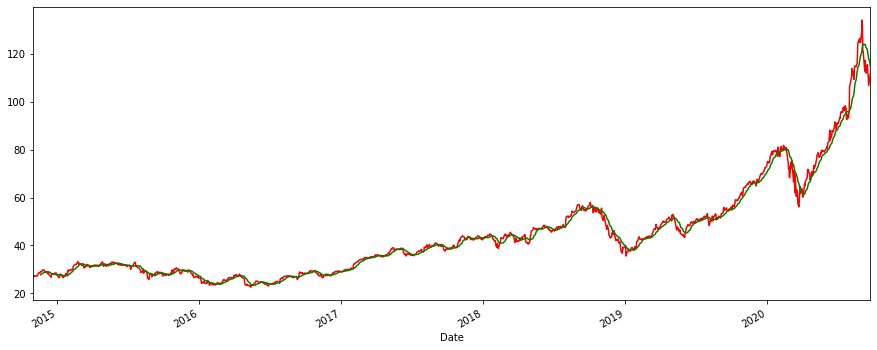

In [8]:
# 統計学 Simple Moving Average
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean() # 過去14日間の平均
df_aapl['Close'].plot(figsize=(15,6), color="red")
df_aapl['SMA'].plot(figsize=(15,6), color="green")
plt.show()

In [9]:
# データマイニング
df_aapl['change'] = (((df_aapl['Close'] - df_aapl['Open'])) / (df_aapl['Open']) * 100)
df_fb['change'] = (((df_fb['Close'] - df_fb['Open'])) / (df_fb['Open']) * 100)
df_gold['change'] = (((df_gold['Close'] - df_gold['Open'])) / (df_gold['Open']) * 100)
df_aapl.tail(2).round(2)

,High,Low,Open,Close,Volume,Adj Close,SMA,change
Date,,,,,,,,
2020-09-21,110.19,103.10,104.54,110.08,195713800.0,110.08,116.67,5.30
2020-09-22,112.86,109.16,112.68,111.81,182296300.0,111.81,115.07,-0.77


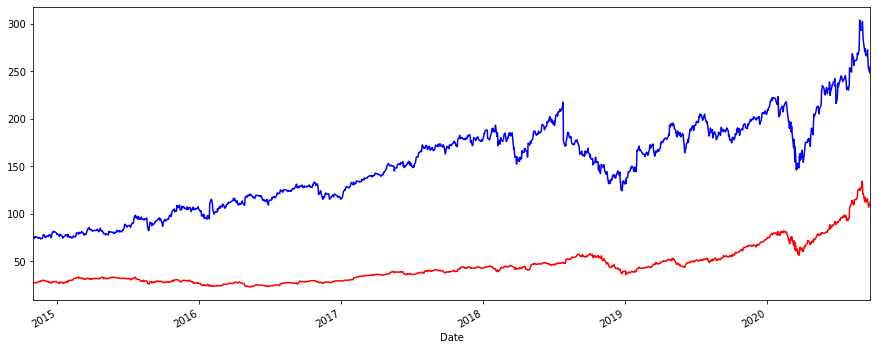

In [10]:
# データマイニング
df_aapl['Close'].plot(figsize=(15,6), color='red')
df_fb['Close'].plot(figsize=(15,6), color='blue')
plt.show()

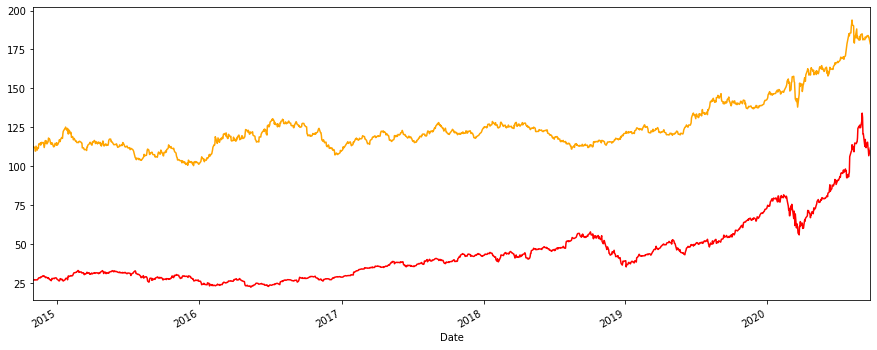

In [11]:
# データマイニング
df_aapl['Close'].plot(figsize=(15,6), color='red')
df_gold['Close'].plot(figsize=(15,6), color='orange')
plt.show()

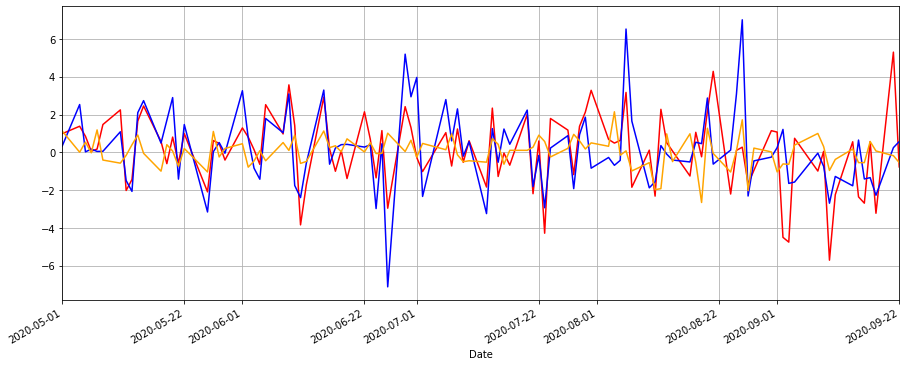

In [13]:
# データマイニング
df_aapl['change'].tail(100).plot(grid=True, figsize=(15,6), color='red')
df_fb['change'].tail(100).plot(grid=True, figsize=(15,6), color='blue')
df_gold['change'].tail(100).plot(grid=True, figsize=(15,6), color='orange')
plt.show()

In [14]:
# 機械学習
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(40)

,High,Low,Open,Close,Volume,Adj Close,SMA,change,label
Date,,,,,,,,,
2020-07-28,94.550003,93.247498,94.367500,93.252502,103625600.0,93.084671,95.781071,-1.181549,117.320000
2020-07-29,95.230003,93.712502,93.750000,95.040001,90329200.0,94.868950,95.730178,1.376001,113.489998
2020-07-30,96.297501,93.767502,94.187500,96.190002,158130000.0,96.016884,95.749464,2.126081,112.000000
2020-07-31,106.415001,100.824997,102.885002,106.260002,374336800.0,106.068756,96.519643,3.280362,115.360001
2020-08-03,111.637497,107.892502,108.199997,108.937500,308151200.0,108.741440,97.368214,0.681611,115.540001
2020-08-04,110.790001,108.387497,109.132500,109.665001,173071600.0,109.467628,98.221072,0.487940,112.129997
2020-08-05,110.392502,108.897499,109.377502,110.062500,121992000.0,109.864410,99.188214,0.626269,110.339996
2020-08-06,114.412498,109.797501,110.404999,113.902496,202428800.0,113.697502,100.443571,3.167880,106.839996
2020-08-07,113.675003,110.292503,113.205002,111.112503,198045600.0,111.112503,101.354643,-1.848415,110.080002


In [36]:
# 機械学習

# ら別業を削除したデータをXに代入
X = np.array(df_aapl.drop(['label', 'SMA'], axis=1))

# 平均を引いて、標準偏差で割って、スケーリングする
X = sklearn.preprocessing.scale(X)
predict_data = X[-30:]

X = X[:-30]
y = np.array(df_aapl['label'])
y = y[:-30]

In [37]:
len(X)

1453

In [38]:
len(y)

1453

In [39]:
# 訓練データと検証データに分ける
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [40]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

accuracy = lr.score(X_test, y_test)
accuracy

0.9104109155310105

In [41]:
# 予測
predict_data = lr.predict(predict_data)
predict_data

array([118.50268251, 120.63713914, 124.21662475, 122.85648434,
       123.25075028, 123.77009056, 125.36977474, 125.9862658 ,
       131.59652149, 134.80928292, 133.50854215, 135.35805214,
       133.63139141, 134.70721512, 137.10417246, 141.22592217,
       136.75435304, 130.38347745, 122.27547952, 123.06221502,
       125.36043668, 121.36575724, 119.4507119 , 122.6375787 ,
       123.1663094 , 121.27972377, 118.72522681, 115.84824523,
       114.24173798, 118.82210379])

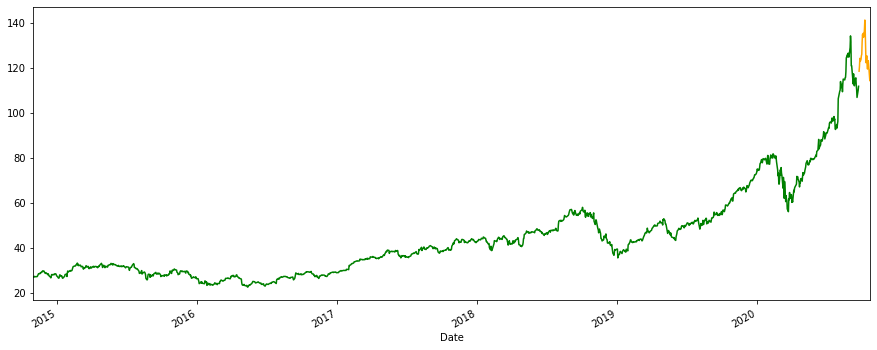

In [43]:
df_aapl['Predict'] = np.nan

last_date = df_aapl.iloc[-1].name

one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predict_data:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date] = np.append([np.nan] * (len(df_aapl.columns) - 1), data)

df_aapl['Close'].plot(figsize=(15,6), color="green")
df_aapl['Predict'].plot(figsize=(15,6), color="orange")
plt.show()

In [45]:
# 人工知能：買ったり売ったり動きがあること
if df_aapl['Predict'][-1] > df_aapl['Close'][-31]:
    print('Buy using REST API')
else:
    print('Sell using REST API')

Buy using REST API
